In [1]:
!pip install networkx

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [7]:
n = 3  # Number of nodes in graph
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
#elist = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0)] #, (2, 3, 1.0)
# tuple is (i,j,weight) where (i,j) is the edge
#G.add_weighted_edges_from(elist)

colors = ["r" for node in G.nodes()]
pos = nx.spring_layout(G)

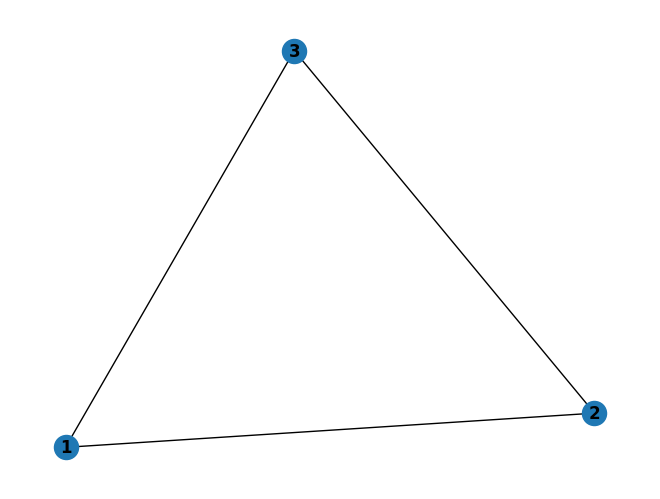

In [9]:
Graph_Example_1 = nx.Graph()
Graph_Example_1.add_edges_from([[1,2],[2,3],[1,3]])
nx.draw(Graph_Example_1,with_labels=True,font_weight='bold')

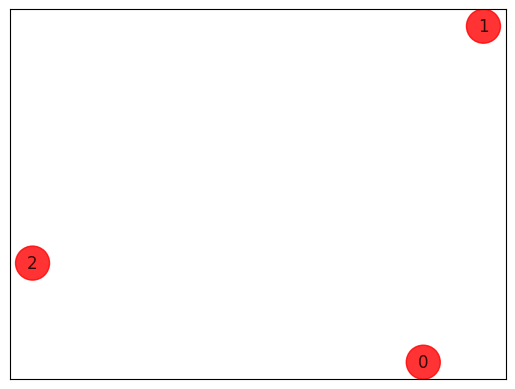

In [8]:
def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
    
draw_graph(G, colors, pos)

In [10]:
n = Graph_Example_1.number_of_nodes() # The number of nodes in the graph

In [11]:
n

3

In [12]:
# Computing the weight matrix from the random graph
w = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i, j, default=0)
        if temp != 0:
            w[i, j] = temp["weight"]
print(w)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [24]:
import perceval as pcvl
from perceval.components import PS, BS, PERM
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
plt.rcdefaults()

In [15]:
num_modes = 3*2

In [16]:
num_modes

6

In [17]:
def U_B(my_circuit1,betas):
    layers = len(betas)
    for layer in range(layers):
        beta = betas[layer]
        for wire in range(0,num_modes,2):
            my_circuit1.add(wire,BS.Rx(2 * beta))

In [18]:
# elist = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0)]
from perceval.components import catalog
def U_C(my_circuit1,gammas,edge_list):
    layers = len(gammas)
    cnot = catalog['heralded cnot'].as_processor().build()
    for layer in range(layers):
        gamma = gammas[layer]
        for edge in edge_list:
            print(edge)
            wire1 = edge[0]*2
            wire2 = edge[1]*2
            my_circuit1.add([wire1,wire1+1,wire2,wire2+1],cnot)
            my_circuit1.add(wire2,BS.H())
            my_circuit1.add(wire2,BS.Rx(2*gamma))
            my_circuit1.add(wire2,BS.H())
            my_circuit1.add([wire1,wire1+1,wire2,wire2+1],cnot)

In [19]:
def circuit(betas,gammas,edge,elist,n_layers=1):
    source = pcvl.Source() 
    QPU = pcvl.Processor("SLOS",8,source)
    
    for wire in range(0,num_modes,2):
        QPU.add(wire,BS.H())
    
    U_B(QPU,betas)
    U_C(QPU,gammas,elist)
    
    return QPU

In [20]:
init_params = 0.01 * np.random.rand(2, 1)
print(init_params)
QPU = circuit(init_params[0],init_params[1],None,elist)
pcvl.pdisplay(QPU)

[[0.00228238]
 [0.00965397]]


NameError: name 'elist' is not defined

In [ ]:
source = pcvl.Source() 
QPU = pcvl.Processor("SLOS",8,source)
init_params = 0.01 * np.random.rand(1, 1)
print(init_params)
U_C(QPU,init_params[0],elist)

QPU.with_input(pcvl.BasicState([1, 0, 1, 0, 1, 0, 1, 0]))
pcvl.pdisplay(QPU)

output_distribution=QPU.probs()["results"]
pcvl.pdisplay(output_distribution, max_v=10)

[[0.00986399]]
(0, 1, 1.0)
(0, 2, 1.0)
(0, 3, 1.0)
(1, 2, 1.0)
(2, 3, 1.0)


In [25]:
circuit_x=PERM([1,0])
circuit_rx=pcvl.Circuit(2) // (0,PS(np.pi)) // BS.Rx(theta= np.pi) // (0,PS(np.pi)) 

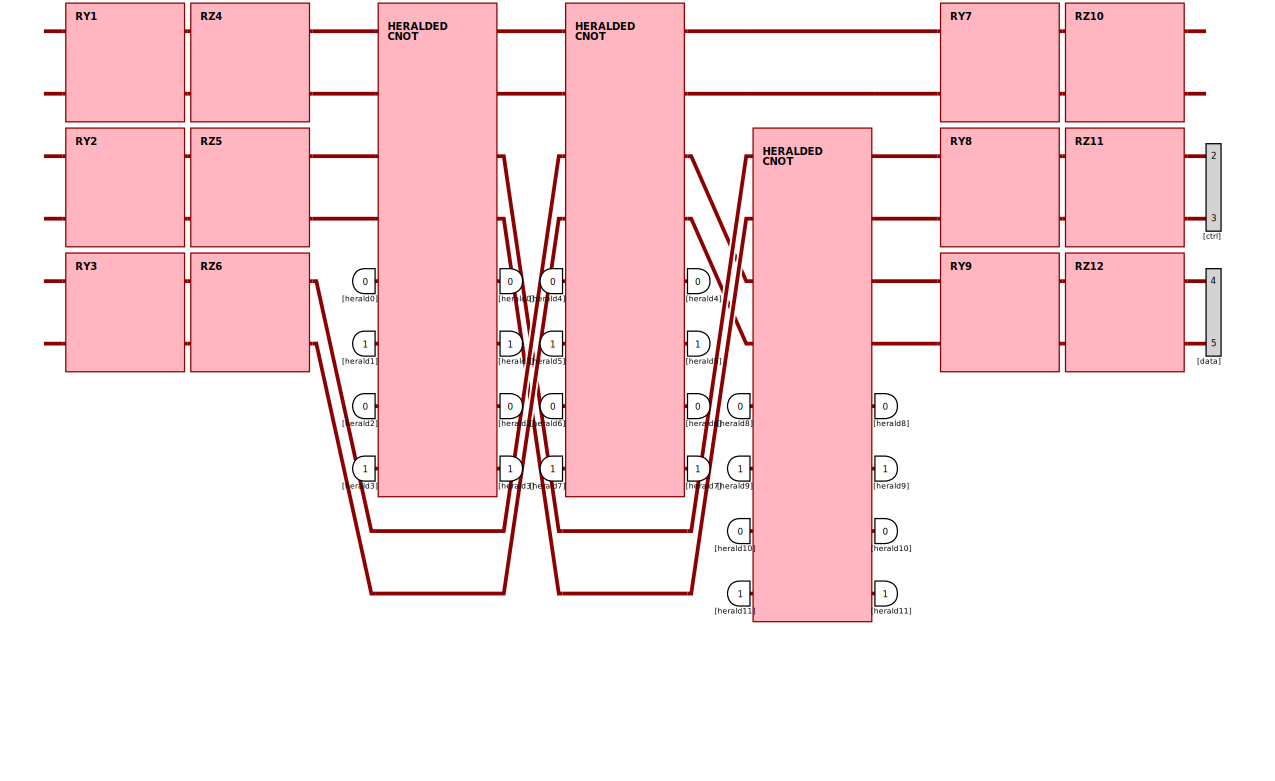

In [26]:
Rx = lambda i: pcvl.Circuit(2) // (0,PS(np.pi)) // BS.Rx(theta= np.pi) // (0,PS(np.pi)) #Be careful for the minus ! We use a convention
Ry = lambda i: pcvl.Circuit(2,name=f"Ry{i}") // BS.Ry(theta= np.pi)
Rz = lambda i: pcvl.Circuit(2,name=f"Rz{i}") // BS.H() // circuit_rx // BS.H()
cnot = catalog['heralded cnot'].as_processor().build()

# Our qubits in the dual rail encoding
q1, q2, q3 = [0,1], [2,3], [4,5]

p = pcvl.Processor("SLOS",6)

for i in range(3):
    p.add(2*i,Ry(i+1)).add(2*i,Rz(i+4))
p.add(q1+q2, cnot)
p.add(q1+q3, cnot)
p.add(q2+q3, cnot)

for i in range(3):
    p.add(2*i, Ry(i+7)).add(2*i, Rz(i+10))

pcvl.pdisplay(p,recursive=False)

In [55]:
p.with_input(pcvl.BasicState([1, 0, 1, 0, 1, 0]))
pcvl.pdisplay(p)

output_distribution=p.probs()["results"]
pcvl.pdisplay(output_distribution, max_v=10)

state,probability
"|1,0,0,1,0,1>",0.99999
"|1,0,1,0,1,0>",7.99514e-06
"|1,0,0,1,1,0>",0
"|1,0,1,0,0,1>",0


In [27]:
q1+q2

[0, 1, 2, 3]